Lab 6 

This model is classifing 5 differnt types of rice. I will be using both accuracy and a confusion matrix to evaluate the model. Accuracy is a good measuerment for this model because the data is balanced so, for example, 80% accurate would not mean that it is only choosing 1 class. But because accuracy does not show the whole story of the model, I am also using a confusion matrix to get a more in depth evaluation 

In [2]:
import tensorflow.keras as keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model


##Loading Data

In [3]:
from PIL import Image
import os
import numpy as np
#test = os.listdir('./ships_dataset/test')
#train = os.listdir('./ships_dataset/train')
#valid = os.listdir('./ships_dataset/valid')
#print(test)
files = os.listdir("./Rice_Image_Dataset/")
print(files)
#X_train = []
#y_train = []
#
#X_test = []
#y_test = []


['Rice_Citation_Request.txt', 'Karacadag', 'Ipsala', 'Arborio', 'Basmati', 'Jasmine']


Functions to help load/preprocess

In [4]:
img_h=36
img_l=36
def normalization(img):
    #img is accepted as numpy array
    #img =img* (255.0 / img.max())
    img = img.astype(np.float32) / 255.0
    return img
def load_imgs(path):
    classes_unclean = os.listdir(path)
    classes =[]
    for class_ in classes_unclean:
        if class_ != "Rice_Citation_Request.txt":
            classes.append(class_)
    print(classes)
    X = []
    y = []
    
    print(path+classes[0])
    for cl in classes:
        imgs = os.listdir(path+cl)
        for img in imgs:
            image = Image.open(path+cl+"/"+img).convert("L")
            #image = image.resize((24, 24))
            #image =

            #image = np.asarray(image)
            #print(image.shape)
            image = image.resize((img_h,img_l))
            #image = np.reshape(image,(24, 24,-1))
            image = np.asarray(image)
            #preform normalization
            image = normalization(image)
            #print(image.shape)
            X.append(image)
            y.append(cl)

    return X,y

To split my data I am using a stratified split split. This is a good method to split the data because there are equal amounts of data in each class. Also, because there are a large number of samples in each class, a k-fold method is not necessary to help increase the number of items used for training. This mirrors realistic situations because adding a k-fold would increase the time to train each model, as it would effectivly add more samples, but because it has many samples already, the model would not be significantly better for the amount of time it would take to train.

In [5]:
#X_test,y_test =load_imgs("./ships_dataset/test/")
#print(type(X_test[0]))
#X_train,y_train =load_imgs("./ships_dataset/train/")
#X_val,y_val =load_imgs("./ships_dataset/valid/")
from sklearn.model_selection import train_test_split
X,y = load_imgs("./Rice_Image_Dataset/")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#X_train, X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=10)


['Karacadag', 'Ipsala', 'Arborio', 'Basmati', 'Jasmine']
./Rice_Image_Dataset/Karacadag


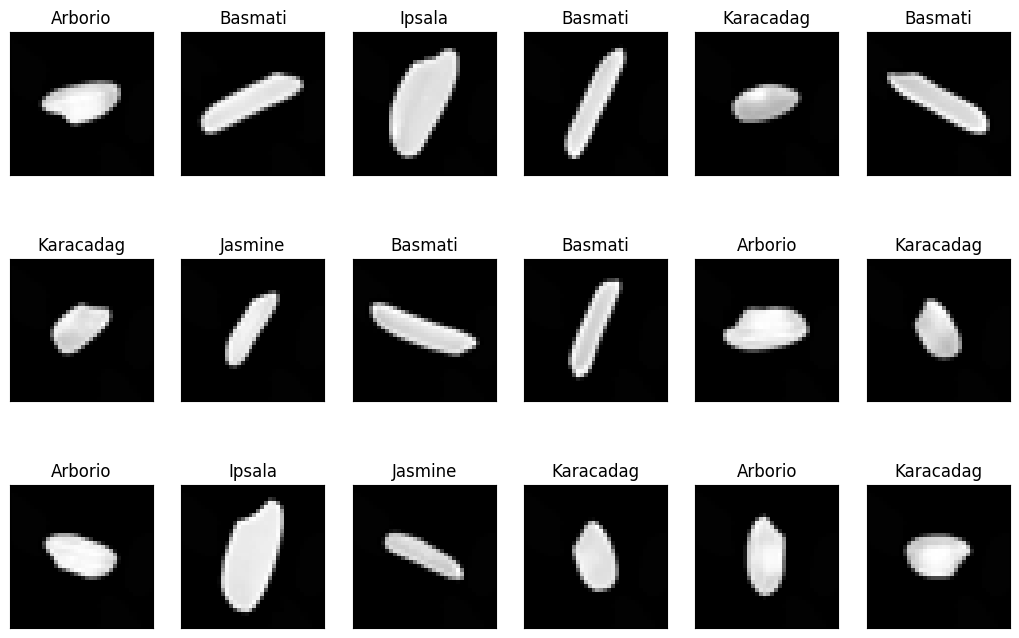

In [6]:
from matplotlib import pyplot as plt
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].squeeze(), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)
plot_gallery(X_train, y_train, img_h, img_l) # defaults to showing a 3 by 6 subset of the images






#Encoding Labels

In [7]:
#a function to show metrics of a model
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
def show_metrics(cnn,X_test, y_test, labels='auto',name="CNN"):
    plt.figure(figsize=(15, 5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(X_test), axis=1)
        acc_cnn = mt.accuracy_score(y_test, yhat_cnn)
        plt.subplot(1, 2, 1)
        cm = mt.confusion_matrix(y_test, yhat_cnn)
        cm = cm / np.sum(cm, axis=1)[:, np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
        plt.title(f'{name}: {acc_cnn:.4f}')
        print(f'CNN: {acc_cnn:.4f}')

def plot_a(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['test'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [8]:
NUM_CLASSES = len(set(y_train))
def one_hot(y_train,y_test,y_val,NUM_CLASSES):

    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

    return y_train_ohe,y_test_ohe#,y_val_ohe


def one_hot_ord(y_train,y_test,y_val,NUM_CLASSES):

    y_train_ohe = keras.utils.to_ordinal(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_ordinal(y_test, NUM_CLASSES)

    return y_train_ohe,y_test_ohe#,y_val_ohe


def encode(y_train,y_test):

    le = LabelEncoder()
    le.fit(y_train)
    y_train_ohe = le.transform(y_train)
    le.fit(y_test)
    y_test_ohe = le.transform(y_test)
    return y_train_ohe, y_test_ohe

y_train_ohe,y_test_ohe = encode(y_train,y_test)



#Image Augmentation
I will be preforming data augmentation inside the model
For the MLP and first CNN architecutre model I will use RandomFlip and RandomRotation
For the second CNN architecture I will be using RandomFlip, RandomRotation,RandomTranslation,RandomBrightness, and RandomContrast

I will first build the run the base MLP model, then the CNN models

##Creating Base MLP

In [9]:
from tensorflow.keras.layers import RandomFlip, RandomRotation

mlp = Sequential()

mlp.add( RandomFlip("horizontal") )
mlp.add( RandomRotation(0.2) )
mlp.add( Flatten() ) # make images flat for the MLP input

mlp.add( Dense(input_dim=1, units=30,activation='relu') )
mlp.add( Dense(units=15, activation='relu') )
mlp.add( Dense(NUM_CLASSES) )
mlp.add( Activation('softmax') )

#mlp.compile(loss='mean_squared_error',
 #             optimizer='rmsprop',
  #            metrics=['accuracy'])

mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:

history_mlp = mlp.fit(np.array(X_train), np.asarray(y_train_ohe), epochs=150,shuffle=True, verbose=1)



Epoch 1/150
1875/1875 [==============================] - 3s 990us/step - loss: 1.4695 - accuracy: 0.3151
Epoch 2/150
1875/1875 [==============================] - 2s 898us/step - loss: 1.3936 - accuracy: 0.3592
Epoch 3/150
1875/1875 [==============================] - 2s 971us/step - loss: 1.3650 - accuracy: 0.3769
Epoch 4/150
1875/1875 [==============================] - 2s 923us/step - loss: 1.3476 - accuracy: 0.3821
Epoch 5/150
1875/1875 [==============================] - 2s 911us/step - loss: 1.3334 - accuracy: 0.3919
Epoch 6/150
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3208 - accuracy: 0.3973
Epoch 7/150
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3221 - accuracy: 0.3992
Epoch 8/150
1875/1875 [==============================] - 2s 933us/step - loss: 1.2940 - accuracy: 0.4100
Epoch 9/150
1875/1875 [==============================] - 2s 918us/step - loss: 1.2973 - accuracy: 0.4119
Epoch 10/150
1875/1875 [==============================] - 2

##Creating a CNN

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 36, 16)        80        
                                                                 
 random_flip_1 (RandomFlip)  (None, 36, 36, 16)        0         
                                                                 
 random_rotation_1 (RandomR  (None, 36, 36, 16)        0         
 otation)                                                        
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 18, 64)        0         
 D)                                                   

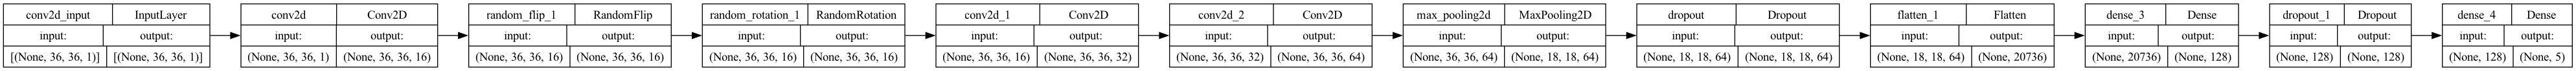

In [11]:
cnn = Sequential()

cnn.add( Conv2D(filters=16, kernel_size= (2, 2), padding='same',
                input_shape=(img_h,img_l,1),
               ) )

cnn.add( RandomFlip("horizontal") )
cnn.add( RandomRotation(0.2) )

cnn.add(Conv2D(filters=32,
                input_shape = (24,24,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) 
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) 
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25)) 
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(NUM_CLASSES, activation='softmax'))
print(cnn.summary())

plot_model(
    cnn, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

#Train and fit CNN

In [12]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = cnn.fit(np.asarray(X_train),np.asarray(y_train_ohe),batch_size=32, epochs=5,shuffle=True, verbose=1)


Epoch 1/5
1875/1875 [==============================] - 145s 77ms/step - loss: 0.1826 - accuracy: 0.9372
Epoch 2/5
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1295 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 138s 73ms/step - loss: 0.1252 - accuracy: 0.9609
Epoch 4/5
1875/1875 [==============================] - 130s 69ms/step - loss: 0.1366 - accuracy: 0.9575
Epoch 5/5
1875/1875 [==============================] - 144s 77ms/step - loss: 0.1446 - accuracy: 0.9560


469/469 [==============================] - 9s 18ms/step
CNN: 0.9655


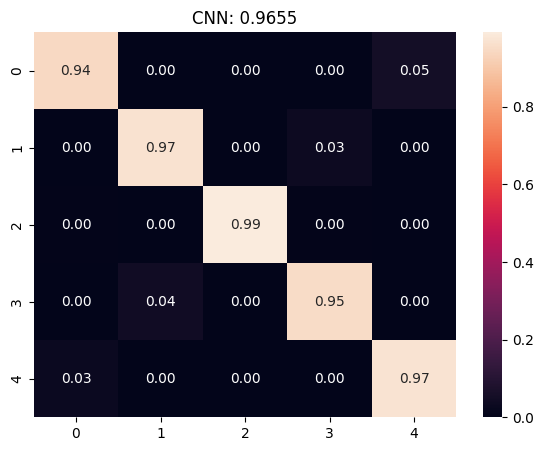

In [13]:
show_metrics(cnn,np.array(X_test),np.array(y_test_ohe))

#Creating the same CNN with different parameters

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 36, 36, 16)        80        
                                                                 
 random_flip_2 (RandomFlip)  (None, 36, 36, 16)        0         
                                                                 
 random_rotation_2 (RandomR  (None, 36, 36, 16)        0         
 otation)                                                        
                                                                 
 conv2d_4 (Conv2D)           (None, 36, 36, 16)        2320      
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 36, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 32)        0         
 g2D)                                                 

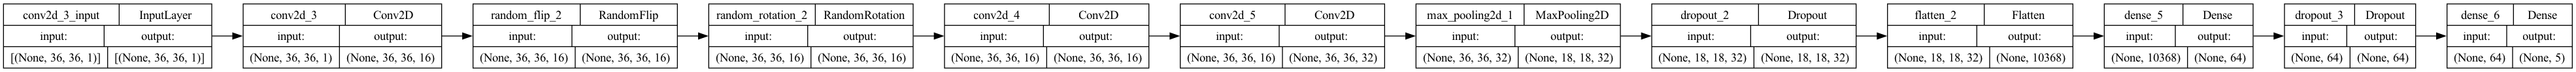

In [14]:
cnn_1 = Sequential()

cnn_1.add( Conv2D(filters=16, kernel_size= (2, 2), padding='same',
                input_shape=(img_h,img_l,1),
               ) )

cnn_1.add( RandomFlip("horizontal") )
cnn_1.add( RandomRotation(0.2) )

cnn_1.add(Conv2D(filters=16,
                input_shape = (12,12,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) 
cnn_1.add(Conv2D(filters=32,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu'))
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
cnn_1.add(Dropout(0.25))
cnn_1.add(Flatten())
cnn_1.add(Dense(64, activation='relu'))
cnn_1.add(Dropout(0.5)) 
cnn_1.add(Dense(NUM_CLASSES, activation='softmax'))
print(cnn_1.summary())

plot_model(
    cnn_1, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

Epoch 1/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.2437 - accuracy: 0.9119
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1531 - accuracy: 0.9470
Epoch 3/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1367 - accuracy: 0.9539
Epoch 4/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1219 - accuracy: 0.9599
Epoch 5/5
469/469 [==============================] - 5s 10ms/step
CNN: 0.9718


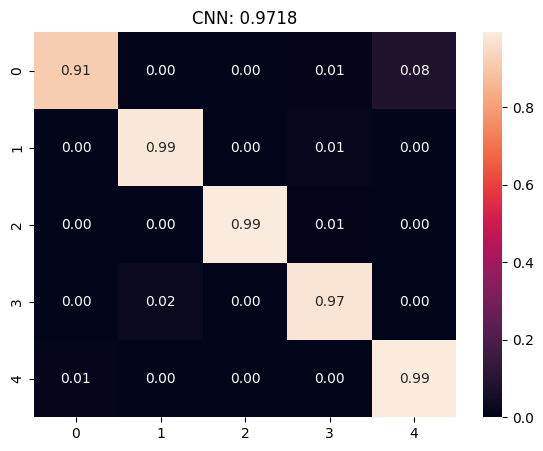

In [15]:
#running the model
cnn_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_1 = cnn_1.fit(np.asarray(X_train),np.asarray(y_train_ohe),batch_size=32, epochs=5,shuffle=True, verbose=1)
show_metrics(cnn_1,np.array(X_test),np.array(y_test_ohe))

##Creating a second CNN architecture

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 36, 36, 1)         0         
                                                                 
 random_rotation_3 (RandomR  (None, 36, 36, 1)         0         
 otation)                                                        
                                                                 
 random_translation (Random  (None, 36, 36, 1)         0         
 Translation)                                                    
                                                                 
 random_brightness (RandomB  (None, 36, 36, 1)         0         
 rightness)                                                      
                                                                 
 random_contrast (RandomCon  (None, 36, 36, 1)         0         
 trast)                                               

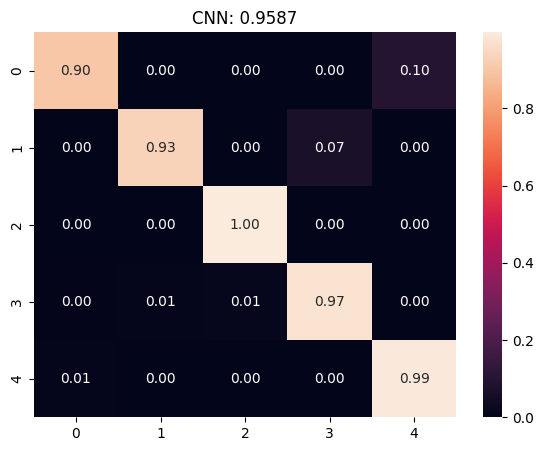

In [16]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation
from tensorflow.keras.layers import RandomContrast, RandomBrightness
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
l2_lambda = 0.0001
cnn_2 = Sequential()

cnn_2.add( RandomFlip("horizontal") ) 
cnn_2.add( RandomRotation(0.05) )
cnn_2.add( RandomTranslation(height_factor=0.1, width_factor=0.1) ) 
cnn_2.add( RandomBrightness(factor=0.1, value_range=(0.0, 1.0)) ) 
cnn_2.add( RandomContrast(0.1) ) 


cnn_2.add(Conv2D(filters=32,
               input_shape = (img_h,img_l,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',
               data_format="channels_last")) 

cnn_2.add(Conv2D(filters=32,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
cnn_2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn_2.add(Conv2D(filters=64,
               input_shape = (img_h,img_l,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last")) 

cnn_2.add(Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu'))
cnn_2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn_2.add(Conv2D(filters=128,
               input_shape = (img_h,img_l,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last")) 

cnn_2.add(Conv2D(filters=128,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
    



cnn_2.add(Flatten())
cnn_2.add(Dropout(0.25)) 
cnn_2.add(Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnn_2.add(Dropout(0.5)) 
cnn_2.add(Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             ))


cnn_2.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

cnn_2.build((None,36,36,1))
cnn_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_2.summary()

history_2 = cnn_2.fit(np.array(X_train),np.array(y_train_ohe), batch_size=128, 
           epochs=5, verbose=1
        )
show_metrics(cnn_2,np.array(X_test),np.array(y_test_ohe))

#Using the same (2nd) CNN architecture but changing parameters (changing the filter and kernal size of the convolution layers)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_4 (RandomFlip)  (None, 36, 36, 1)         0         
                                                                 
 random_rotation_4 (RandomR  (None, 36, 36, 1)         0         
 otation)                                                        
                                                                 
 random_translation_1 (Rand  (None, 36, 36, 1)         0         
 omTranslation)                                                  
                                                                 
 random_brightness_1 (Rando  (None, 36, 36, 1)         0         
 mBrightness)                                                    
                                                                 
 random_contrast_1 (RandomC  (None, 36, 36, 1)         0         
 ontrast)                                             

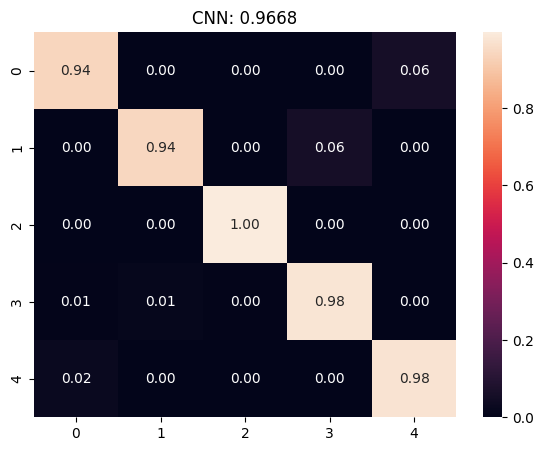

In [17]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation
from tensorflow.keras.layers import RandomContrast, RandomBrightness
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
l2_lambda = 0.0001
cnn_3 = Sequential()

cnn_3.add( RandomFlip("horizontal") ) # flip horizontally
cnn_3.add( RandomRotation(0.05) ) # rotate by 5%
cnn_3.add( RandomTranslation(height_factor=0.1, width_factor=0.1) ) # move by 10%
cnn_3.add( RandomBrightness(factor=0.1, value_range=(0.0, 1.0)) ) # add some to the mean
cnn_3.add( RandomContrast(0.1) ) # add or decrease contrast


cnn_3.add(Conv2D(filters=32,
               input_shape = (img_h,img_l,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',
               data_format="channels_last")) # more compact syntax

cnn_3.add(Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
cnn_3.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn_3.add(Conv2D(filters=128,
               input_shape = (img_h,img_l,1),
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last")) # more compact syntax

cnn_3.add(Conv2D(filters=64,
               kernel_size=(3,3),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu'))
cnn_3.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))

cnn_3.add(Conv2D(filters=32,
               input_shape = (img_h,img_l,1),
               kernel_size=(2,2),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last")) # more compact syntax

cnn_3.add(Conv2D(filters=16,
               kernel_size=(2,2),
               kernel_initializer='he_uniform', 
               kernel_regularizer=l2(l2_lambda),
               padding='same', 
               activation='relu',data_format="channels_last"))
    

# add one layer on flattened output

cnn_3.add(Flatten())
cnn_3.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn_3.add(Dense(128, 
              activation='relu',
              kernel_initializer='he_uniform',
              kernel_regularizer=l2(l2_lambda)
       ))
cnn_3.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn_3.add(Dense(NUM_CLASSES, 
              activation='softmax', 
              kernel_initializer='glorot_uniform',
              kernel_regularizer=l2(l2_lambda)
             ))

# Let's train the model 
cnn_3.compile(loss='categorical_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

cnn_3.build((None,36,36,1))
cnn_3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_3.summary()

# now fit with random augmentations applied during training only
history_3 = cnn_3.fit(np.array(X_train),np.array(y_train_ohe), batch_size=128, 
           epochs=5, verbose=1
        )

show_metrics(cnn_3,np.array(X_test),np.array(y_test_ohe))

#Comparing Models (CNN,MLP)

469/469 [==============================] - 8s 17ms/step
CNN: 0.9655
469/469 [==============================] - 0s 552us/step
MLP: 0.9233


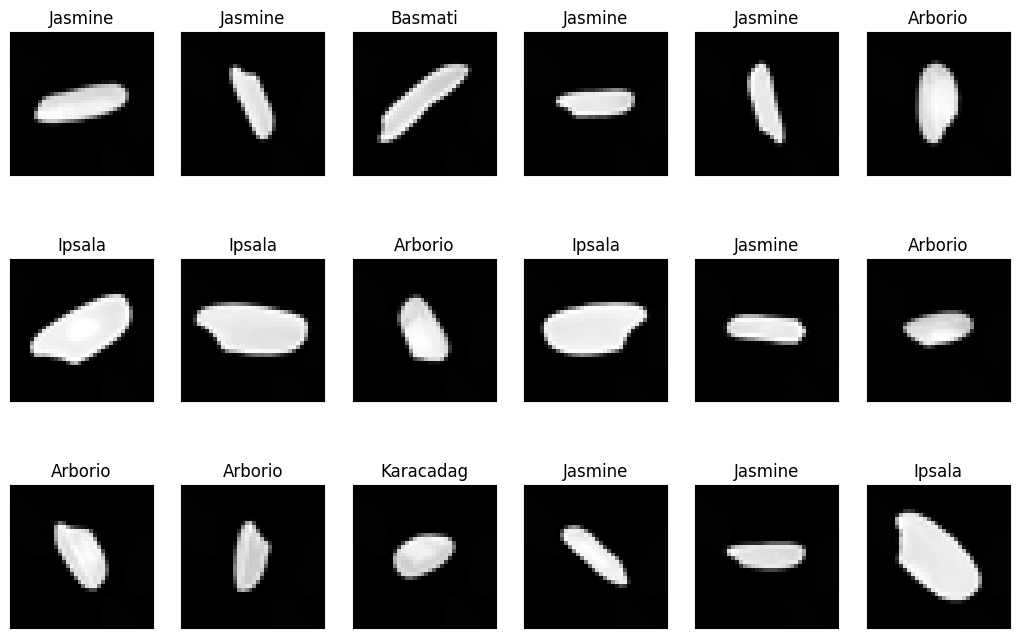

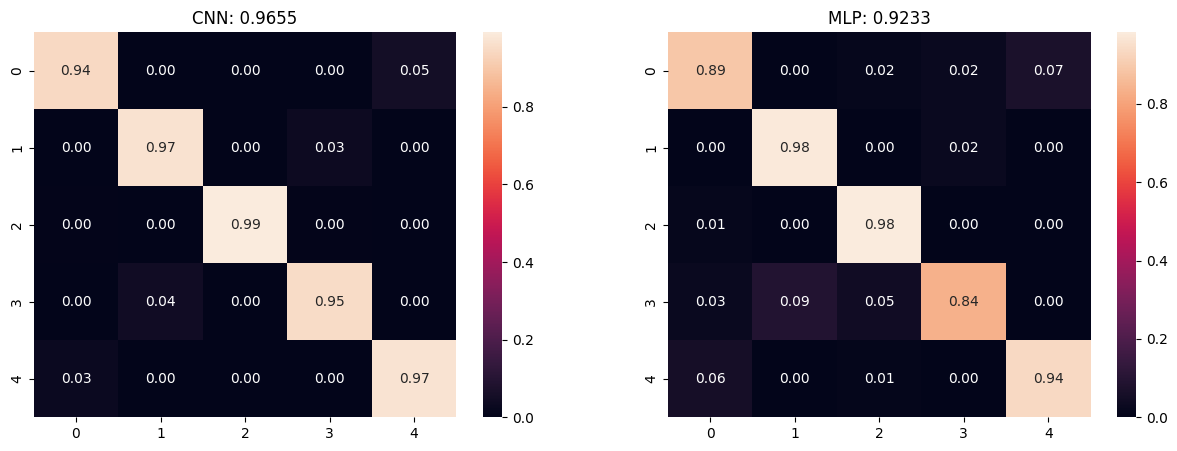

In [18]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def compare_mlp_cnn(cnn, mlp, X_test, y_test, labels='auto'):
    plt.figure(figsize=(15, 5))
    if cnn is not None:
        yhat_cnn = np.argmax(cnn.predict(X_test), axis=1)
        acc_cnn = mt.accuracy_score(y_test, yhat_cnn)
        plt.subplot(1, 2, 1)
        cm = mt.confusion_matrix(y_test, yhat_cnn)
        cm = cm / np.sum(cm, axis=1)[:, np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
        plt.title(f'CNN: {acc_cnn:.4f}')
        print(f'CNN: {acc_cnn:.4f}')

    if mlp is not None:
        yhat_mlp = np.argmax(mlp.predict(X_test), axis=1)
        acc_mlp = mt.accuracy_score(y_test, yhat_mlp)
        plt.subplot(1, 2, 2)
        cm = mt.confusion_matrix(y_test, yhat_mlp)
        cm = cm / np.sum(cm, axis=1)[:, np.newaxis]
        sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
        plt.title(f'MLP: {acc_mlp:.4f}')
        print(f'MLP: {acc_mlp:.4f}')

#print(y_test)
#print(y_test_ohe)
#print(X_test)
plot_gallery(X_test, y_test, 8, 8)
compare_mlp_cnn(cnn,mlp,np.array(X_test),np.array(y_test_ohe))


The CNN perfoms significanlty better than the MLP. This is not unexpected because CNNs have architecutes specifically designed to learn on images

#Comparing the first architectures 

469/469 [==============================] - 7s 16ms/step
CNN: 0.9655
469/469 [==============================] - 4s 8ms/step
CNN: 0.9718


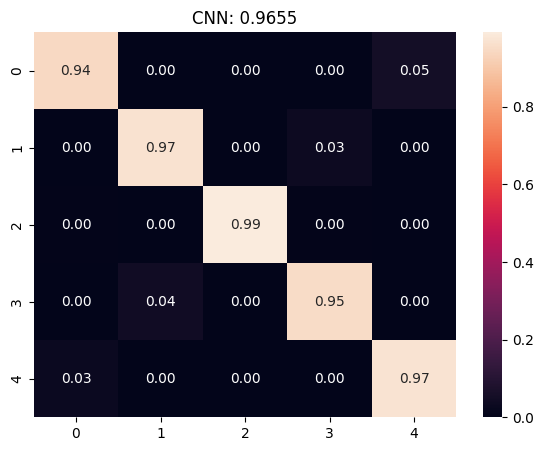

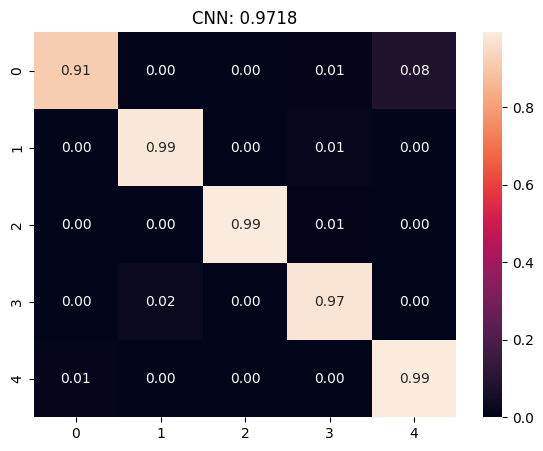

In [19]:

show_metrics(cnn,np.array(X_test),np.array(y_test_ohe))


show_metrics(cnn_1,np.array(X_test),np.array(y_test_ohe))

#Comparing the second architectues

469/469 [==============================] - 14s 30ms/step
CNN: 0.9587
469/469 [==============================] - 15s 32ms/step
CNN: 0.9668


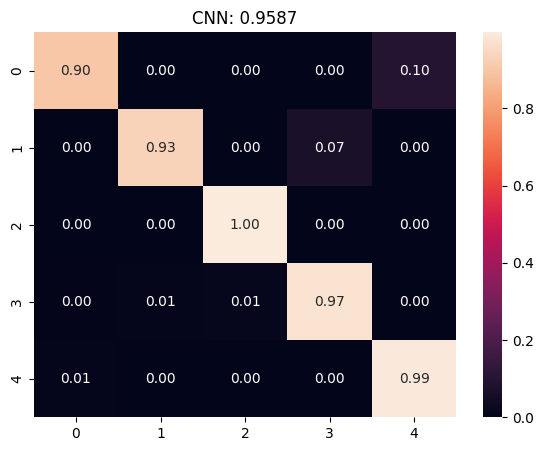

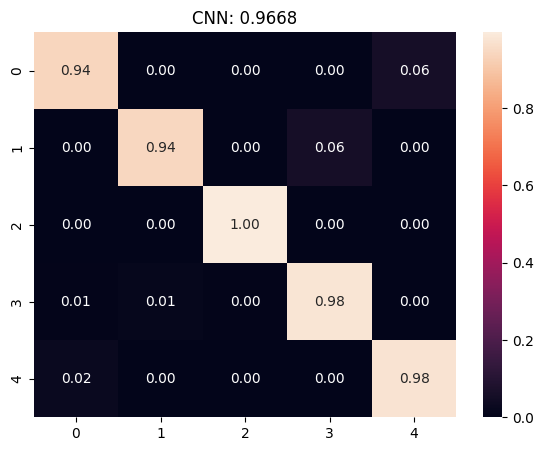

In [20]:

show_metrics(cnn_2,np.array(X_test),np.array(y_test_ohe))


show_metrics(cnn_3,np.array(X_test),np.array(y_test_ohe))

Both architectures produced about the same results at about 96-97%. The biggest changes on preformance were slight changes in how they were predicting specific samples. Grain type (2) was generally predicted the most correctly, with the modified version of the first architecture being the exception, however it was not guessing significantly lower. Architecture 1 did the worst at predicting grain type 0 and architecture 2 had a little more variation in that regard

Below is something interesting I found my very first model doing. When using mean squared error as a loss function and rmsprop as an optimizer the model(first CNN architecture) would only predict one class. I am showing that below

In [21]:
cnn = Sequential()

cnn.add( Conv2D(filters=16, kernel_size= (2, 2), padding='same',
                input_shape=(img_h,img_l,1),
               ) )

cnn.add( RandomFlip("horizontal") )
cnn.add( RandomRotation(0.2) )

cnn.add(Conv2D(filters=32,
                input_shape = (24,24,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) 
cnn.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) 
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25)) 
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(NUM_CLASSES, activation='softmax'))
print(cnn.summary())

plot_model(
    cnn, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

cnn.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=['accuracy'])

#cnn.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = cnn.fit(np.asarray(X_train),np.asarray(y_train_ohe),batch_size=32, epochs=5,shuffle=True, verbose=1)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 36, 36, 16)        80        
                                                                 
 random_flip_5 (RandomFlip)  (None, 36, 36, 16)        0         
                                                                 
 random_rotation_5 (RandomR  (None, 36, 36, 16)        0         
 otation)                                                        
                                                                 
 conv2d_19 (Conv2D)          (None, 36, 36, 32)        4640      
                                                                 
 conv2d_20 (Conv2D)          (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                 

469/469 [==============================] - 8s 16ms/step
CNN: 0.1989


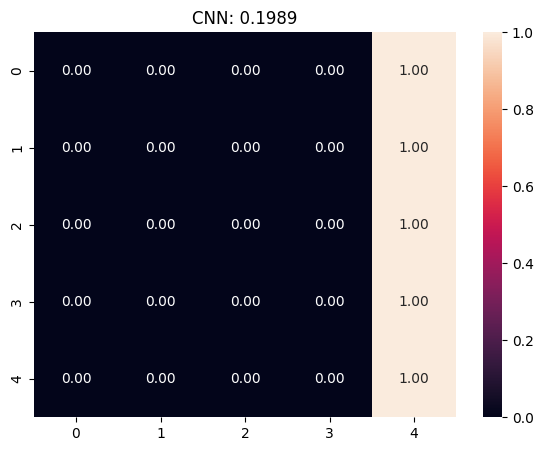

In [22]:
show_metrics(cnn,np.array(X_test),np.array(y_test_ohe))